# Comparison of Three Methods to Clear Sponge-Wedge Chips

## Summary Graphs

### Data

In [1]:
data_csv_filename = 'method_comparison_data.xlsx'

In [2]:
def _get_src_dir() -> str:
    return os.path.split(os.path.dirname(os.path.abspath('__file__')))[0]

In [3]:
import os
from pathlib import Path
os.chdir(_get_src_dir())
from src.utility import _Utility
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [4]:
data_path = os.path.join(_Utility.get_user_data_dir_path(), data_csv_filename)

In [5]:
print(data_path)

/home/mkrause/data/biofuel-cell/method_comparison_data.xlsx


#### Read all sheets of the Excel file

In [6]:
try:
    xlsx = pd.read_excel(data_path, sheet_name=None)
    print(xlsx.keys())
except FileNotFoundError as e:
    print(f'Error: {e}')
    path = Path(data_path)
    if not _Utility.path_exists(path):
        print(f"path {path} doesn't exist")
    if not _Utility.dir_exists(path):
        print(f"directory 'data' doesn't exist")
    if not _Utility.file_exists(path):
        print(f"file {data_csv_filename} doesn't exist")

dict_keys(['Sheet1'])


Add a 'Sheet' column to each dataframe. This is necessary because the sheet names are not a column in the Excel file.

In [7]:
# for sheet_name in xlsx.keys():
#     xlsx[sheet_name]['Sheet'] = sheet_name

Concatenate sheets of positive controls into one DataFrame

In [8]:
df = pd.concat(xlsx[frame] for frame in xlsx.keys())

### Define constants for the analysis

In [9]:
col_data = '% cleared'
col_category = 'experiment ID'
col_iteration = 'iteration'
col_chip_id = 'chip ID'
col_section = 'chip side(f or b)'
experiments = (1, 2, 3)
col_frac_not_cleared = 'number of channels not cleared'
fig_png = 'png'
fig_svg = 'svg'
title = 'Comparison of Clearance Methods'
# df[df[col_category] == 3]

Cast all entries in the column holding the chip IDs as strings.

In [10]:
df[col_chip_id] = df[col_chip_id].astype(str)

Make sure that our dataframe has no NANs in the `% cleared` column

In [11]:
df = df[df[col_frac_not_cleared] > 1.0]
df

,experiment ID,image filename,chip ID,chip side(f or b),iteration,number of channels not cleared,% cleared
0,3,IMG_7478,N-1,front,1,36,43.7500
1,3,IMG_7479,N-1,back,1,28,56.2500
2,3,IMG_7480,N-2,front,1,20,68.7500
3,3,IMG_7481,N-2,back,1,32,50.0000
4,3,IMG_7482,N-3,front,1,24,62.5000
5,3,IMG_7483,N-3,back,1,30,53.1250
6,3,IMG_7533,N-1,front,2,13,79.6875
7,3,IMG_7534,N-1,back,2,8,87.5000
8,3,IMG_7531,N-2,front,2,8,87.5000
9,3,IMG_7530,N-2,back,2,22,65.6250


## Plot all data

### Plot individual data by experiment ID and iteration

{'_stale': True, 'stale_callback': <function _stale_axes_callback at 0x7fa1699a1fc0>, '_axes': <Axes: title={'center': 'experiment ID = 1'}, xlabel='iteration', ylabel='% cleared'>, 'figure': <Figure size 840x400 with 3 Axes>, '_transform': <matplotlib.transforms.IdentityTransform object at 0x7fa0fadd0790>, '_transformSet': True, '_visible': True, '_animated': False, '_alpha': None, 'clipbox': <matplotlib.transforms.TransformedBbox object at 0x7fa0fadd0700>, '_clippath': None, '_clipon': True, '_label': '_child0', '_picker': None, '_rasterized': False, '_agg_filter': None, '_mouseover': False, '_callbacks': <matplotlib.cbook.CallbackRegistry object at 0x7fa0fadd0070>, '_remove_method': <built-in method remove of list object at 0x7fa0fa3eb600>, '_url': None, '_gid': None, '_snap': None, '_sketch': None, '_path_effects': None, '_sticky_edges': _XYPair(x=[], y=[]), '_in_layout': True, '_A': None, '_norm': <matplotlib.colors.Normalize object at 0x7fa0fadd0040>, '_id_norm': 0, 'cmap': <matp

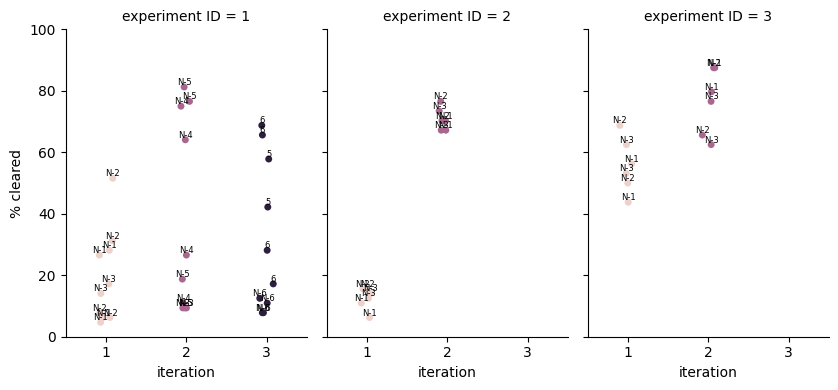

In [44]:
g = sns.catplot(
    data=df,
    x=col_iteration,
    y=col_data,
    col=col_category,
    hue=col_iteration,
    kind='strip',  # show individual data points
    dodge=False,
    height=4,
    aspect=0.7,
    legend=False
)

for ax in g.axes.flat:
    for i, point in enumerate(ax.collections):
        print(point.__dict__)
        offsets = point.get_offsets()
        print(offsets)
        for j, (x, y) in enumerate(offsets):
            label = df[col_chip_id][i * len(offsets) + j]
#             print(f'label: {label}')
            ax.text(x, y, label, ha='center', va='bottom', fontsize=6)

plt.ylim(0, 100)
plt.savefig(f'{_Utility.get_user_data_dir_path()}/method_comparison/data_by_exp_id_and_iteration_v1.{fig_png}')
plt.savefig(f'{_Utility.get_user_data_dir_path()}/method_comparison/data_by_exp_id_and_iteration_v1.{fig_svg}')
plt.show()

    # Add in points to show each observation
#     sns.stripplot(group, x=col_category, y=col_data, size=6, color=".3")

### Summary statistics of clearance after each iteration in each experiment ID

In [ ]:
grouped = df.groupby([col_category, col_iteration])
# for name, group in grouped:
#     print(f'Group: {group}')
#     print(name)
summary_stats = grouped[col_data].agg(['mean', 'std', 'count'])
print(summary_stats)

### Create a summary plot

In [ ]:
sns.set_theme(style="ticks")

# Create boxplots.
for experiment in experiments:
    df_filtered = df[(df[col_category] == experiment) & (df[col_frac_not_cleared] > 1.0)]
    sns.boxplot(
        df_filtered, x=col_category, y=col_data, hue=col_category,
        whis=[0, 100], width=.6, palette="vlag"
    )
    # Add in points to show each observation
    sns.stripplot(df_filtered, x=col_category, y=col_data, size=6, color=".3")

plt.ylim(0, 100)
plt.title(title)

# Remove the legend
plt.legend([],[], frameon=False)

plt.savefig(f'{_Utility.get_user_data_dir_path()}/method_comparison/boxplot_v1.{fig_png}')
plt.savefig(f'{_Utility.get_user_data_dir_path()}/method_comparison/boxplot_v1.{fig_svg}')

plt.show()

### Cluster data
From the plot it looks like data points from experiment 1 fall into two clusters. Here we use Gaussian mixture model and the Expectation-Maximization algorithm to identify two clusters from the data.

In [ ]:
df_filtered = df[(df[col_category] == 1) & (df[col_frac_not_cleared] > 1.0)]
df_filtered[col_data].tolist()

In [ ]:
from sklearn.mixture import GaussianMixture
import numpy as np
from typing import Any

def find_clusters(data: Any) -> np.ndarray:
    """Find clusters in data."""
    data = np.array(data)

    # Fit GMM
    gmm = GaussianMixture(n_components=2)  # Assuming two peaks
    gmm.fit(data.reshape(-1, 1))

    # Predict clusters
    clusters = gmm.predict(data.reshape(-1, 1))
    
    return clusters

data = df_filtered[col_data].tolist()
clusters = find_clusters(data=data)

# Plotting the results
plt.scatter(data, np.zeros_like(data), c=clusters, cmap='viridis')
plt.title('Clustering Experiment 1 data using a Gaussian mixture model')
plt.xlabel(col_data)
plt.savefig(f'{_Utility.get_user_data_dir_path()}/method_comparison/experiment_1_gmm_cluster.{fig_png}')
plt.show()

### Average and Standard Deviation

In [ ]:
from statistics import mean, stdev

def get_mean_and_stdev(category: int, data: list, clusters: np.ndarray) -> tuple[float, float]:
    data = [x for idx, x in enumerate(data) if clusters.tolist()[idx] == category]
    return mean(data), stdev(data)

print(clusters.tolist())
df_ = df[(df[col_category] == 1) & (df[col_frac_not_cleared] > 1.0)]
data = df_[col_data].tolist()
print(data)

categories = {'low_clearance': 0, 'high_clearance': 1}
# Experiment 1 low clearance:
mean_, stdev_ = get_mean_and_stdev(categories['low_clearance'], data=data, clusters=clusters)
print(f'low clearance: mean: {mean_}, standard dev.: {stdev_}')

# Experiment 1 high clearance:
mean_, stdev_ = get_mean_and_stdev(categories['high_clearance'], data=data, clusters=clusters)
print(f'high clearance: mean: {mean_}, standard dev.: {stdev_}')

# Experiment 3:
df_ = df[(df[col_category] == 3) & (df[col_frac_not_cleared] > 1.0)]
data = df_[col_data].tolist()
print(f'Exp. 3 clearance: mean: {mean(data)}, standard dev.: {stdev(data)}')